## Clustering Practice 

### Problem Defination
The dataset is the 2 years' electricity demand, try to clustering the client to help on understanding the electricity demand among different kinds of client.

### Data Preparation

In [1]:
#pathToFile = r"C:\\path\\to\\file\\"
pathToFile = r"/Users/haoyuefeng/Desktop/Git/Customer_segmentation/Practice1/"

fileName = 'LD2011_2014.txt'

In [2]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import random
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
random.seed(42)

In [3]:
# Replace "," by ".", otherwise the numbers will be in the form 2,3445 instead of 2.3445
import fileinput

with fileinput.FileInput(pathToFile+fileName, inplace=True, backup='.bak') as file:
    for line in file:
        print(line.replace(",", "."), end='')

In [4]:
# Create dataframe
import pandas as pd
data = pd.read_csv(pathToFile+fileName, sep=";", index_col=0)

### Quick data inspection

In [5]:
data.head(2)

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
data.tail(2)

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2014-12-31 23:45:00,1.269036,21.337127,1.737619,166.666667,85.365854,285.714286,10.17524,225.589226,64.685315,72.043011,...,246.252677,28000.0,1443.037975,909.090909,26.075619,4.095963,664.618086,146.911519,646.627566,6540.540541
2015-01-01 00:00:00,2.538071,19.914651,1.737619,178.861789,84.146341,279.761905,10.17524,249.158249,62.937063,69.892473,...,188.436831,27800.0,1409.282700,954.545455,27.379400,4.095963,628.621598,131.886477,673.020528,7135.135135


In [7]:
data.shape

(140256, 370)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140256 entries, 2011-01-01 00:15:00 to 2015-01-01 00:00:00
Columns: 370 entries, MT_001 to MT_370
dtypes: float64(370)
memory usage: 397.0+ MB


In [9]:
data.describe()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
count,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,...,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000
mean,3.970785,20.768480,2.918308,82.184490,37.240309,141.227385,4.521338,191.401476,39.975354,42.205152,...,218.213701,37607.987537,1887.427366,2940.031734,65.413150,9.269709,424.262904,94.704717,625.251734,8722.355145
std,5.983965,13.272415,11.014456,58.248392,26.461327,98.439984,6.485684,121.981187,29.814595,33.401251,...,204.833532,38691.954832,1801.486488,2732.251967,65.007818,10.016782,274.337122,80.297301,380.656042,9195.155777
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.844950,0.000000,36.585366,15.853659,71.428571,0.565291,111.111111,13.986014,9.677419,...,5.710207,0.000000,0.000000,0.000000,13.037810,0.000000,0.000000,30.050083,83.944282,0.000000
50%,1.269036,24.893314,1.737619,87.398374,39.024390,157.738095,2.826456,222.222222,40.209790,40.860215,...,131.334761,24100.000000,1050.632911,2136.363636,31.290743,7.021650,525.899912,76.794658,758.064516,0.000000
75%,2.538071,29.871977,1.737619,115.853659,54.878049,205.357143,4.522329,279.461279,57.692308,61.290323,...,403.283369,54800.000000,3312.236287,5363.636364,108.213820,11.702750,627.743635,151.919866,875.366569,17783.783784
max,48.223350,115.220484,151.172893,321.138211,150.000000,535.714286,44.657999,552.188552,157.342657,198.924731,...,852.962170,192800.000000,7751.054852,12386.363636,335.071708,60.269163,1138.718174,362.270451,1549.120235,30918.918919


### Plot some sample data

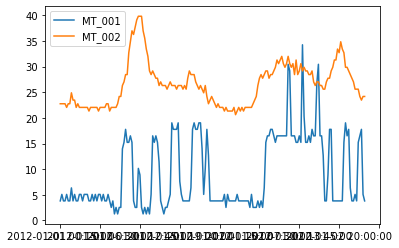

In [10]:
data_example = data.loc['2012-01-01 00:15:00':'2012-01-03 00:00:00'][['MT_001','MT_002']]
data_example.plot()
plt.show()

Comment: Need to normalize the curves to allow the clustering technique capture the consumption throughout the day.

### Prepare Data for analysis

Note: Put focus on year 2013 and 2014

In [11]:
data2011 = data.loc['2011-01-01 00:15:00':'2012-01-01 00:00:00']
data2012 = data.loc['2012-01-01 00:15:00':'2013-01-01 00:00:00']
data2013 = data.loc['2013-01-01 00:15:00':'2014-01-01 00:00:00']
data2014 = data.loc['2014-01-01 00:15:00':'2015-01-01 00:00:00']

In [12]:
# Check number of days
print(data2011.shape[0]/96)
print(data2012.shape[0]/96)
print(data2013.shape[0]/96)
print(data2014.shape[0]/96)

365.0
366.0
365.0
365.0


In [13]:
# See number of clients with 0 demand per year
print(sum(data2011.mean()==0))
print(sum(data2012.mean()==0))
print(sum(data2013.mean()==0))
print(sum(data2014.mean()==0))

210
37
21
1


In [14]:
clients = data2011.columns
clients_no_demand = clients[data2013.mean()==0] # clients with 0 demand
data_13_14 = data2013.append(data2014) # appending 2013 and 2014
data_13_14 = data_13_14.drop(clients_no_demand, axis=1) # drop clients with 0 demand
print(data_13_14.shape)
print(sum(data_13_14.mean()==0)) # check that there are no clients with 0 demand

(70080, 349)
0


## Getting average curves per client

In [15]:
data = data_13_14.copy() # weekdays weekends, data2011, data2012, data2013, data2014

In [16]:
data['hour'] = data.index.map(lambda x: x[11:])

In [17]:
data.head(3)

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370,hour
2013-01-01 00:15:00,2.538071,22.759602,2.606429,138.211382,63.414634,255.952381,4.522329,239.057239,57.692308,78.494624,...,22300.0,886.075949,1000.000000,16.949153,6.436513,616.330114,76.794658,731.671554,8086.486486,00:15:00
2013-01-01 00:30:00,1.269036,22.759602,2.606429,138.211382,63.414634,264.880952,5.652911,228.956229,57.692308,76.344086,...,21000.0,864.978903,909.090909,18.252934,3.510825,564.530290,76.794658,727.272727,8086.486486,00:30:00
2013-01-01 00:45:00,2.538071,22.759602,2.606429,134.146341,60.975610,250.000000,5.652911,239.057239,54.195804,76.344086,...,18200.0,860.759494,840.909091,16.949153,5.851375,590.869183,68.447412,730.205279,7848.648649,00:45:00


### Getting average curves per client

In [18]:
datagrouped = data.groupby("hour")
average_curves = datagrouped.agg("mean")
average_curves.shape 

(96, 349)

In [19]:
average_curves_norm = average_curves/(average_curves.mean())

#### Plot some sample data

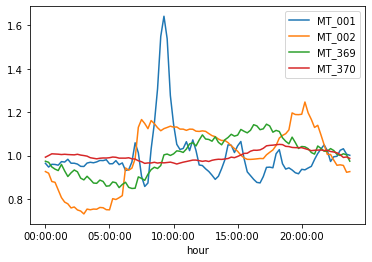

In [20]:
average_curves_norm[['MT_001','MT_002','MT_369','MT_370']].plot()
plt.show()

## Clustering Analysis on the average normalized curves

In [21]:
X = average_curves_norm.copy()   
X = np.array(X.T) 

In [22]:
## Cluster the 730 days for a single client.
client = 'MT_022' 
oneClient = data_13_14[client]
X_Q2 = [] # a list of arrays, each array being a normalized curve for a day
for J in range(2*365):
    X_Q2.extend([np.array(oneClient[J*96:(J+1)*96])])#/np.mean(oneClient[J*96:(J+1)*96])]) 

X_Q2 = np.array(X_Q2)
X_Q2.shape

(730, 96)

In [23]:
## Clustering 349 Clients
X_Q1 = average_curves_norm.copy()
X_Q1 = np.array(X_Q1.T)
X_Q1.shape

(349, 96)

In [24]:
X_Q1

array([[0.96479215, 0.94737834, 0.96010381, ..., 1.03176835, 1.00665227,
        1.00162906],
       [0.92667365, 0.91911689, 0.8807438 , ..., 0.95492484, 0.9233459 ,
        0.92656966],
       [0.99179969, 0.97779638, 0.9765787 , ..., 1.00397648, 0.99849693,
        0.99301737],
       ...,
       [1.17044059, 1.22381837, 1.21134255, ..., 1.17431116, 1.15378816,
        1.13637963],
       [0.97430716, 0.96926554, 0.94796904, ..., 1.00867049, 1.00368029,
        0.97461078],
       [0.99296729, 1.00054813, 1.00851498, ..., 0.99165659, 0.99394714,
        0.98743097]])

In [25]:
X_Q2

array([[31.13325031, 28.64259029, 27.39726027, ..., 26.77459527,
        23.66127024, 24.28393524],
       [22.41594022, 22.41594022, 20.54794521, ..., 23.03860523,
        23.66127024, 24.28393524],
       [21.79327522, 21.17061021, 20.54794521, ..., 26.77459527,
        28.01992528, 26.15193026],
       ...,
       [28.64259029, 29.8879203 , 27.39726027, ..., 36.11457036,
        32.37858032, 29.8879203 ],
       [29.26525529, 29.8879203 , 30.51058531, ..., 29.8879203 ,
        24.28393524, 23.66127024],
       [24.90660025, 26.77459527, 23.66127024, ..., 36.11457036,
        34.24657534, 31.13325031]])

In [26]:
data_13_14_T = data_13_14.T

In [27]:
oneClient

2013-01-01 00:15:00    31.133250
2013-01-01 00:30:00    28.642590
2013-01-01 00:45:00    27.397260
2013-01-01 01:00:00    24.906600
2013-01-01 01:15:00    24.283935
                         ...    
2014-12-31 23:00:00    31.133250
2014-12-31 23:15:00    34.246575
2014-12-31 23:30:00    36.114570
2014-12-31 23:45:00    34.246575
2015-01-01 00:00:00    31.133250
Name: MT_022, Length: 70080, dtype: float64

In [28]:
data_13_14.index

Index(['2013-01-01 00:15:00', '2013-01-01 00:30:00', '2013-01-01 00:45:00',
       '2013-01-01 01:00:00', '2013-01-01 01:15:00', '2013-01-01 01:30:00',
       '2013-01-01 01:45:00', '2013-01-01 02:00:00', '2013-01-01 02:15:00',
       '2013-01-01 02:30:00',
       ...
       '2014-12-31 21:45:00', '2014-12-31 22:00:00', '2014-12-31 22:15:00',
       '2014-12-31 22:30:00', '2014-12-31 22:45:00', '2014-12-31 23:00:00',
       '2014-12-31 23:15:00', '2014-12-31 23:30:00', '2014-12-31 23:45:00',
       '2015-01-01 00:00:00'],
      dtype='object', length=70080)

In [29]:
##oneClient.T.plot()

In [30]:
##XX=np.asarray(X)
##YY=data_13_14.index ##.tolist()
XX=np.array(X_Q2).reshape(-1,1)

In [31]:
XX.shape

(70080, 1)

In [32]:
XX

array([[31.13325031],
       [28.64259029],
       [27.39726027],
       ...,
       [36.11457036],
       [34.24657534],
       [31.13325031]])

In [33]:
YY=np.array(data_13_14.index).reshape(-1,1)

In [34]:
YY.shape

(70080, 1)

In [35]:
YY

array([['2013-01-01 00:15:00'],
       ['2013-01-01 00:30:00'],
       ['2013-01-01 00:45:00'],
       ...,
       ['2014-12-31 23:30:00'],
       ['2014-12-31 23:45:00'],
       ['2015-01-01 00:00:00']], dtype=object)

#### Optimal number of clusters

In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [37]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_Q1)
    Sum_of_squared_distances.append(km.inertia_)

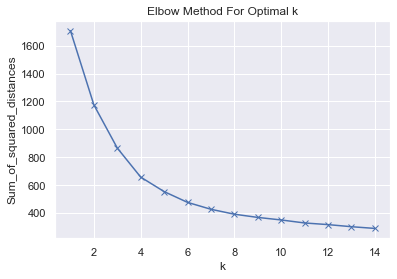

In [38]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Comment: In the plot above, based on Elbow Method, the elbow is at k=4 indicating the optimal k for this dataset is 4

#### Plot for each cluster

In [39]:
data_13_14

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2013-01-01 00:15:00,2.538071,22.759602,2.606429,138.211382,63.414634,255.952381,4.522329,239.057239,57.692308,78.494624,...,64.953605,22300.0,886.075949,1000.000000,16.949153,6.436513,616.330114,76.794658,731.671554,8086.486486
2013-01-01 00:30:00,1.269036,22.759602,2.606429,138.211382,63.414634,264.880952,5.652911,228.956229,57.692308,76.344086,...,61.384725,21000.0,864.978903,909.090909,18.252934,3.510825,564.530290,76.794658,727.272727,8086.486486
2013-01-01 00:45:00,2.538071,22.759602,2.606429,134.146341,60.975610,250.000000,5.652911,239.057239,54.195804,76.344086,...,42.826552,18200.0,860.759494,840.909091,16.949153,5.851375,590.869183,68.447412,730.205279,7848.648649
2013-01-01 01:00:00,1.269036,23.470839,2.606429,130.081301,56.097561,226.190476,6.218202,249.158249,50.699301,75.268817,...,44.254104,15800.0,860.759494,840.909091,16.949153,4.095963,575.065847,58.430718,722.873900,7848.648649
2013-01-01 01:15:00,3.807107,23.470839,2.606429,130.081301,58.536585,229.166667,6.783493,239.057239,57.692308,74.193548,...,44.254104,15000.0,793.248945,818.181818,16.949153,4.095963,570.676032,60.100167,748.533724,7610.810811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 23:00:00,2.538071,22.048364,1.737619,150.406504,85.365854,303.571429,11.305822,282.828283,68.181818,72.043011,...,276.945039,28200.0,1616.033755,1363.636364,29.986962,5.851375,697.102722,176.961603,651.026393,7621.621622
2014-12-31 23:15:00,2.538071,21.337127,1.737619,166.666667,81.707317,324.404762,11.305822,252.525253,64.685315,72.043011,...,279.800143,28300.0,1569.620253,1340.909091,29.986962,9.947338,671.641791,168.614357,669.354839,6702.702703
2014-12-31 23:30:00,2.538071,20.625889,1.737619,162.601626,82.926829,318.452381,10.175240,242.424242,61.188811,74.193548,...,284.796574,27800.0,1556.962025,1318.181818,27.379400,9.362200,670.763828,153.589316,670.087977,6864.864865
2014-12-31 23:45:00,1.269036,21.337127,1.737619,166.666667,85.365854,285.714286,10.175240,225.589226,64.685315,72.043011,...,246.252677,28000.0,1443.037975,909.090909,26.075619,4.095963,664.618086,146.911519,646.627566,6540.540541


In [40]:
data_13_14_T

,2013-01-01 00:15:00,2013-01-01 00:30:00,2013-01-01 00:45:00,2013-01-01 01:00:00,2013-01-01 01:15:00,2013-01-01 01:30:00,2013-01-01 01:45:00,2013-01-01 02:00:00,2013-01-01 02:15:00,2013-01-01 02:30:00,...,2014-12-31 21:45:00,2014-12-31 22:00:00,2014-12-31 22:15:00,2014-12-31 22:30:00,2014-12-31 22:45:00,2014-12-31 23:00:00,2014-12-31 23:15:00,2014-12-31 23:30:00,2014-12-31 23:45:00,2015-01-01 00:00:00
MT_001,2.538071,1.269036,2.538071,1.269036,3.807107,1.269036,2.538071,2.538071,1.269036,2.538071,...,2.538071,1.269036,2.538071,2.538071,1.269036,2.538071,2.538071,2.538071,1.269036,2.538071
MT_002,22.759602,22.759602,22.759602,23.470839,23.470839,23.470839,24.182077,24.893314,24.182077,23.470839,...,22.048364,22.048364,22.048364,22.048364,22.048364,22.048364,21.337127,20.625889,21.337127,19.914651
MT_003,2.606429,2.606429,2.606429,2.606429,2.606429,2.606429,2.606429,2.606429,2.606429,2.606429,...,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619
MT_004,138.211382,138.211382,134.146341,130.081301,130.081301,130.081301,132.113821,136.178862,130.081301,123.983740,...,156.504065,164.634146,160.569106,162.601626,156.504065,150.406504,166.666667,162.601626,166.666667,178.861789
MT_005,63.414634,63.414634,60.975610,56.097561,58.536585,58.536585,57.317073,56.097561,52.439024,50.000000,...,86.585366,93.902439,87.804878,80.487805,85.365854,85.365854,81.707317,82.926829,85.365854,84.146341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MT_366,6.436513,3.510825,5.851375,4.095963,4.095963,3.510825,5.266238,4.095963,4.681100,4.681100,...,3.510825,6.436513,11.702750,8.191925,4.681100,5.851375,9.947338,9.362200,4.095963,4.095963
MT_367,616.330114,564.530290,590.869183,575.065847,570.676032,579.455663,565.408253,550.482880,537.313433,452.151010,...,546.971027,521.510097,672.519754,719.051800,707.638279,697.102722,671.641791,670.763828,664.618086,628.621598
MT_368,76.794658,76.794658,68.447412,58.430718,60.100167,58.430718,60.100167,56.761269,58.430718,48.414023,...,185.308848,173.622705,213.689482,205.342237,188.647746,176.961603,168.614357,153.589316,146.911519,131.886477
MT_369,731.671554,727.272727,730.205279,722.873900,748.533724,670.087977,664.222874,699.413490,707.478006,675.953079,...,653.958944,658.357771,711.876833,694.281525,652.492669,651.026393,669.354839,670.087977,646.627566,673.020528


#### Apply K Means Clustering

In [41]:
## kmeans = KMeans(n_clusters=4)
## kmeans.fit(data_13_14_T)
## data_13_14_T['kmeans_4'] = kmeans.labels_
## data_13_14_T.describe()

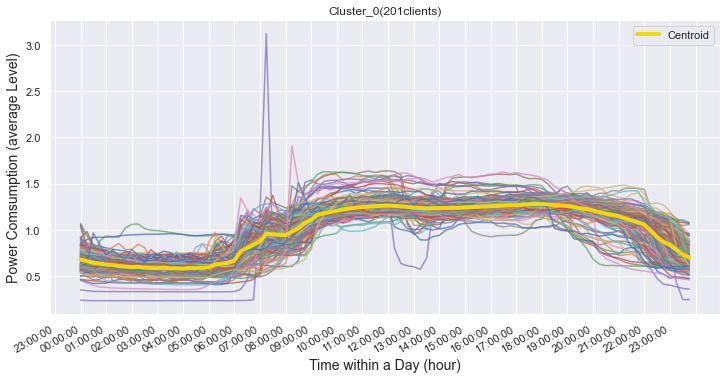

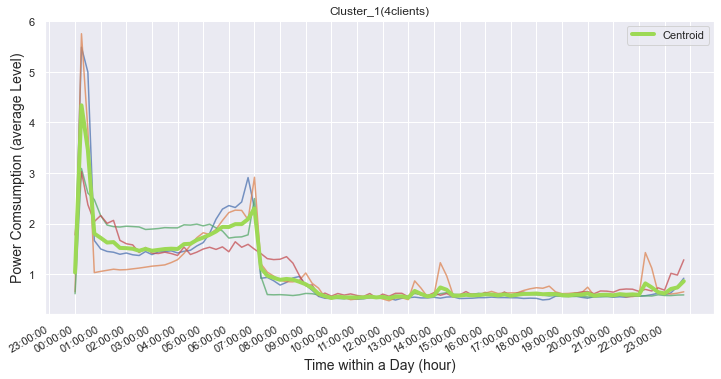

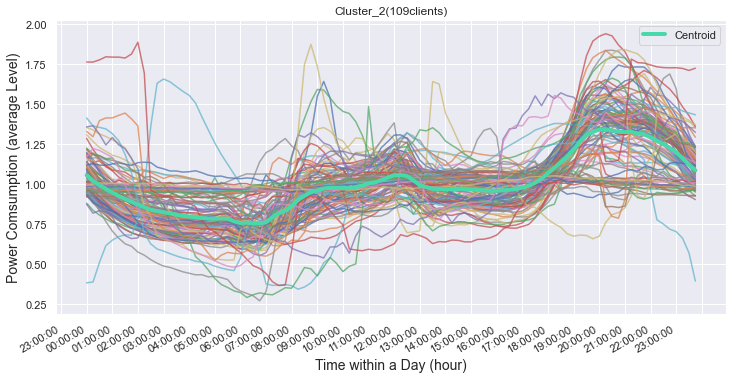

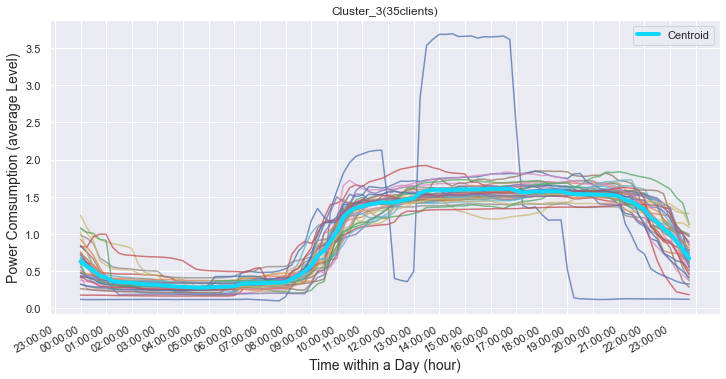

In [42]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

KMeans = KMeans(n_clusters = 4, random_state = 0).fit(X_Q1)
max_label, min_label = np.max(KMeans.labels_),np.min(KMeans.labels_)
num_label = max_label - min_label +1

clusters = ["Cluster_"]*num_label
variables = locals()
centroid = [(abs(0.95-x/(num_label-1)),0.85,x/(num_label-1))for x in range(num_label)]
for idx, item in enumerate(clusters):
    i = idx+min_label
    item+=str(i)
    clusters[idx]=item
    variables[item] = average_curves_norm[average_curves_norm.columns[np.where(KMeans.labels_==i)]]
    df_cluster = variables[item].copy()
    cluster_size = df_cluster.shape[1]
    
    ax=df_cluster.plot(title=item+"("+str(cluster_size)+"clients)",alpha = 0.75, legend = False)
    loc= ticker.MultipleLocator(base = 4)
    ax.xaxis.set_major_locator(loc)
    
    df_cluster["Centroid"] = KMeans.cluster_centers_[idx]
    df_cluster[["Centroid"]].plot(ax=ax, legend= True, c=centroid[idx],linestyle="-",alpha =1, linewidth =4)
    plt.ylabel("Power Comsumption (average Level)", fontsize = 14)
    plt.xlabel("Time within a Day (hour)", fontsize = 14)
    fig = plt.gcf()
    fig.set_size_inches(12,6)
    fig.autofmt_xdate()

In [43]:
from datetime import date, timedelta

d1 = date(2013, 1, 1)  # start date
d2 = date(2014, 12, 31)  # end date
delta = d2 - d1         # timedelta
daysyear = []
D = {0:'mon', 1:'tue', 2:'wed', 3:'thu', 4:'fri', 5:'sat', 6:'sun'}
for i in range(delta.days + 1):
    daysyear.extend([D[(d1 + timedelta(days=i)).weekday()]+"-"+str(d1 + timedelta(days=i))])

In [44]:
from itertools import compress
L = [1,2,3,4]
B = [False, True, True, False]
list(compress(L, B))

[2, 3]

#### Clustering by the k-means algorithm 

In [66]:
inertias_1 = []
silhouette_avgs = []
max_K = 15
for k in np.arange(1,max_K+1):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)    
    inertias_1 = inertias_1 + [kmeans.inertia_]
    if k>1:
        silhouette_avgs = silhouette_avgs + [silhouette_score(X, kmeans.labels_)]

plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title("Inertia_1: sum square distances to closest cluster")
plt.plot(np.arange(1,max_K+1),inertias_1)
plt.xticks(np.arange(1,max_K+1))
plt.xlabel('number of clusters')
plt.grid()

plt.subplot(1,2,2)  
plt.title("Average Silhouette")
plt.plot(np.arange(2,max_K+1), silhouette_avgs)
plt.xticks(np.arange(2,max_K+1))
plt.xlabel('number of clusters')
plt.grid()

plt.show()

ValueError: could not convert string to float: '2013-01-01 00:15:00'

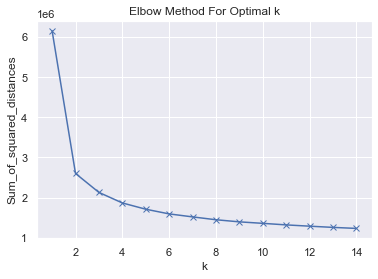

In [45]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_Q2)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In the plot above, based on Elbow Method, the elbow is at k=2 indicating the optimal k for this dataset is 2

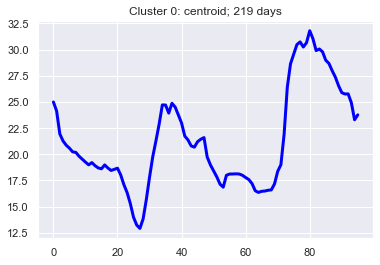

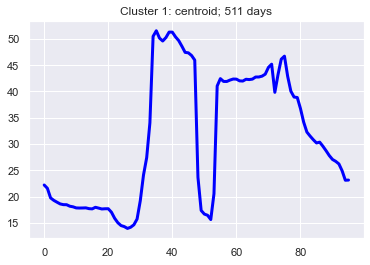

In [46]:
K = 2 # the desired value
kmeans = KMeans(n_clusters=K, random_state=0).fit(X_Q2)  # re-train

# Plots
for c in range(K):
    plt.plot(kmeans.cluster_centers_[c], linewidth=3, color='blue')
    plt.title("Cluster "+str(c)+": centroid; "+str(sum(kmeans.labels_==c))+" days")
    plt.show()

In [47]:
from itertools import compress
list(compress(daysyear, kmeans.labels_==0))

['tue-2013-01-01',
 'sat-2013-01-05',
 'sun-2013-01-06',
 'sat-2013-01-12',
 'sun-2013-01-13',
 'sat-2013-01-19',
 'sun-2013-01-20',
 'sat-2013-01-26',
 'sun-2013-01-27',
 'sat-2013-02-02',
 'sun-2013-02-03',
 'sat-2013-02-09',
 'sun-2013-02-10',
 'tue-2013-02-12',
 'sat-2013-02-16',
 'sun-2013-02-17',
 'sat-2013-02-23',
 'sun-2013-02-24',
 'sat-2013-03-02',
 'sun-2013-03-03',
 'sat-2013-03-09',
 'sun-2013-03-10',
 'sat-2013-03-16',
 'sun-2013-03-17',
 'sat-2013-03-23',
 'sun-2013-03-24',
 'fri-2013-03-29',
 'sat-2013-03-30',
 'sun-2013-03-31',
 'mon-2013-04-01',
 'sat-2013-04-06',
 'sun-2013-04-07',
 'sat-2013-04-13',
 'sun-2013-04-14',
 'sat-2013-04-20',
 'sun-2013-04-21',
 'thu-2013-04-25',
 'sat-2013-04-27',
 'sun-2013-04-28',
 'wed-2013-05-01',
 'thu-2013-05-02',
 'fri-2013-05-03',
 'sat-2013-05-04',
 'sun-2013-05-05',
 'sat-2013-05-11',
 'sun-2013-05-12',
 'sat-2013-05-18',
 'sun-2013-05-19',
 'sat-2013-05-25',
 'sun-2013-05-26',
 'sat-2013-06-01',
 'sun-2013-06-02',
 'sat-2013-0

Comment: Many of these days seem to be weekends, although other week-days may be holidays. 

In [48]:
weekdays = []
for i in range(delta.days + 1):
    weekdays.extend([D[(d1 + timedelta(days=i)).weekday()]])

weekdays_CL0 = list(compress(weekdays, kmeans.labels_==0))
weekdays_CL1 = list(compress(weekdays, kmeans.labels_==1))

In [49]:
from collections import Counter

print(Counter(weekdays_CL0))
print(Counter(weekdays_CL1))

Counter({'sun': 104, 'sat': 58, 'tue': 12, 'mon': 12, 'wed': 12, 'fri': 11, 'thu': 10})
Counter({'thu': 94, 'wed': 93, 'fri': 93, 'tue': 93, 'mon': 92, 'sat': 46})


In [50]:
counter_CL0 = Counter(weekdays_CL0)
counter_CL1 = Counter(weekdays_CL1)

for day in ['mon','tue','wed','thu','fri','sat','sun']:
    if day in counter_CL0.keys():
        print(day, counter_CL0[day]/sum(counter_CL0.values()))

mon 0.0547945205479452
tue 0.0547945205479452
wed 0.0547945205479452
thu 0.045662100456621
fri 0.0502283105022831
sat 0.2648401826484018
sun 0.4748858447488584


Comment: The distribution over the days of the week for each cluster shows that cluster 0 is uniformly distributed over week-days,with around 5% of points (curves) on each day, and then 26% on Saturdays, and 47% on Sunday

In [51]:
for day in ['mon','tue','wed','thu','fri','sat','sun']:
    if day in counter_CL1.keys():
        print(day, counter_CL1[day]/sum(counter_CL1.values()))

mon 0.18003913894324852
tue 0.18199608610567514
wed 0.18199608610567514
thu 0.18395303326810175
fri 0.18199608610567514
sat 0.09001956947162426


Comment: For cluster 0 instead, the weekdays have around 18% of the cluster, while Saturday 9%, and Sunday 0%

#### Clustering by the DBSCAN

In [52]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import numpy as np

# Configuration options
num_samples_total = 1000
cluster_centers = [(3,3), (7,7)]
num_classes = len(cluster_centers)
epsilon = 5
min_samples = 5

# Compute DBSCAN
db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(X_Q2)
labels = db.labels_

no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 1
Estimated no. of noise points: 730


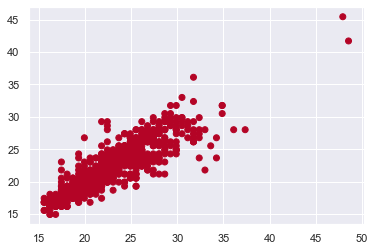

In [53]:
# Generate scatter plot for training data
colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', labels))
plt.scatter(X_Q2[:,0], X_Q2[:,1], c=colors, marker="o", picker=True)
#plt.title('Two clusters with data')
#plt.xlabel('Axis X[0]')
#plt.ylabel('Axis X[1]')
plt.show()

#### Summary

#### Understanding and Finding of Clusters:
    For Silhouette analysis
       - silhouette score is measuring the dense and separated condition of the clusters; range from -1 to 1.
       - A higher score will be better because it means the clusters are very dense and seperated.       
    
    For K-means
       - Clusters have different sizes
       - It seems working well in my case because our dataset is large. 
       - When we change the dataset from a group of people to one client, I got different optimal k for clustering.
        
    For DBSCAN
       - Do not like Silhouette analysis, no need to set number of clusters ahead. 
       - It seems not performing well in mt case. It fit more the case that separate high density from low density.

#### Understanding and Finding for chaning timeframe 
    When I change timeframe, I also tried to group by and sum together, not sure if that is the correct way, but find K changes
    Different timeframe brings different number of clusters.
    Having different result when using K means and Silhouette analysis